In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
sys.path.append('../')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, precision_recall_curve

import tensorflow as tf
import keras 

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, InputLayer, Flatten, Conv2D, MaxPooling2D

np.random.seed(42)
tf.random.set_seed(42)

from preprocessing.getdata import *

plt.rcParams["figure.figsize"] = (20,3)

In [2]:
df = get_csvdata()
data = get_slices(df['ID'], N=0, d=2, dim=2, m=90)
data = np.repeat(data[..., np.newaxis], 3, -1)

In [3]:
HEIGHT = data.shape[1]
WIDTH = data.shape[2]

INPUT_SHAPE = (HEIGHT, WIDTH, 3)
b_model = tf.keras.applications.VGG16(include_top=False, weights='imagenet', input_shape=INPUT_SHAPE)

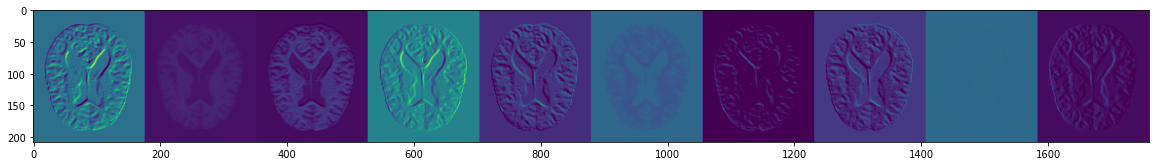

In [12]:
i = 0
img = data[i]#.astype(np.float32)
img = img[np.newaxis, ...]

l=2
for i in range(l):
    img = b_model.layers[i](img)

n=10
imgs = np.concatenate([img[0,:,:,i] for i in range(n)], axis=0).T

plt.imshow(imgs)